In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [7]:
df = pd.read_excel("yahoo_data.xlsx")


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [11]:
data = df['Close*'].dropna()

In [10]:
print(df.columns.tolist())


['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']


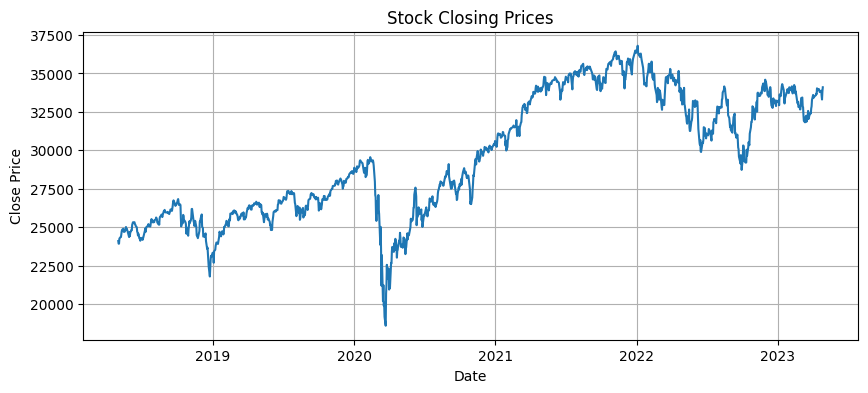

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [13]:
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.4204412523508354
p-value: 0.5724380460701357


In [14]:
if result[1] > 0.05:
    data_diff = data.diff().dropna()
    d = 1
else:
    data_diff = data
    d = 0

In [15]:
model = ARIMA(data, order=(5, d, 2))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\fiar fly\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fiar fly\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fiar fly\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fiar fly\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but 

                               SARIMAX Results                                
Dep. Variable:                 Close*   No. Observations:                 1258
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -9137.723
Date:                Mon, 12 May 2025   AIC                          18291.446
Time:                        00:07:44   BIC                          18332.538
Sample:                             0   HQIC                         18306.890
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6043      0.101    -15.858      0.000      -1.803      -1.406
ar.L2         -0.7228      0.099     -7.315      0.000      -0.916      -0.529
ar.L3          0.0450      0.035      1.300      0.1

In [16]:
n_forecast = 30
forecast = model_fit.forecast(steps=n_forecast)

c:\Users\fiar fly\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fiar fly\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


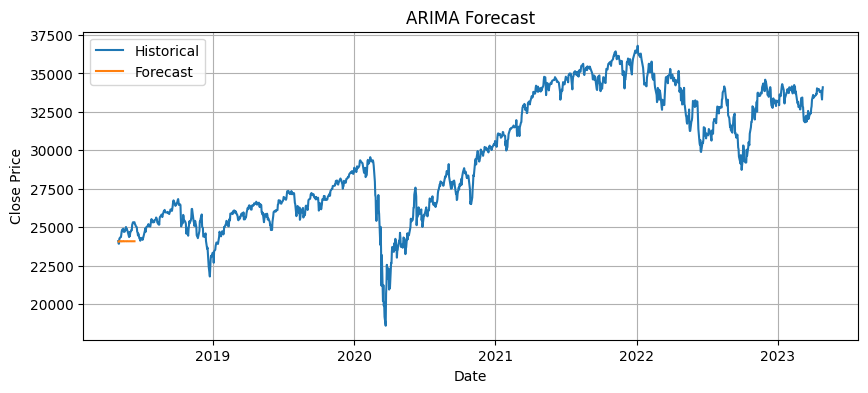

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(data, label='Historical')
plt.plot(pd.date_range(data.index[-1], periods=n_forecast+1, freq='B')[1:], forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()